Import necessary libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from scipy import stats

%matplotlib inline

# EDA 

Explore the datasets- the employees data consists of 8 columns and the demographic consists of 13 columns. \
The goal of the project is to answer following questions; \
1] Who are the top ten people with the highest salary? \
2] Which state has the highest collective salary? \
3] Which state has the most employees working at MegaCorp?

In [0]:
url = 'https://hiring-on-live-at-shareworks.s3.amazonaws.com/employee_data.csv.bz2'
url2 = 'https://hiring-on-live-at-shareworks.s3.amazonaws.com/demographic_data.csv.bz2'
employee = pd.read_csv(url)
demographic = pd.read_csv(url2)

In [3]:
employee.head(2)

,Employee Number,SSN,GIN,Employee Start Date,Work Phone Number,Work Phone Extension,Company Email Address,Salary
0,MXESC71DBJAV217S,833-89-7281,NaN,2018-01-19,(322)919-2663,4730.0,benjaminashley@hotmail.com,93969.33
1,N11KZNKWH6WBK0AS,279-44-2127,NaN,1997-10-05,7363157315,NaN,scott56@burns.org,122429.09


In [4]:
demographic.head(2)

,Employee Number,First Name,Last Name,Middle Name,Date of Birth,Home Address: Street,Home Address: Suite,Home Address: City,Home Address: State/Province,Home Address: Country,Home Address: ZIP/Postal,ADDRESS_LINE_4,CELL/MOBILE_NO
0,MXESC71DBJAV217S,James,Gibson,Anthony,1999-07-07,402 Kenneth Mission Apt. 182,2515.0,Lake Victoriabury,New Jersey,US,18410,NaN,278-437-2933
1,N11KZNKWH6WBK0AS,Michael,Newman,NaN,1962-10-22,80733 Martinez Dam,NaN,Reyesshire,Vermont,US,2919,NaN,001-143-707-8726


In [5]:
print('Size of the employee and demographic data respectively: {}, {}'.format(employee.shape, demographic.shape))

Size of the employee and demographic data respectively: (4000000, 8), (4000000, 13)


We can combine the two datasets on the 'Employee number' which is common to 
both datasets. Once merged it is easy to analyse the data further.

In [6]:
df = pd.merge(employee, demographic, on='Employee Number')
df.head()

,Employee Number,SSN,GIN,Employee Start Date,Work Phone Number,Work Phone Extension,Company Email Address,Salary,First Name,Last Name,Middle Name,Date of Birth,Home Address: Street,Home Address: Suite,Home Address: City,Home Address: State/Province,Home Address: Country,Home Address: ZIP/Postal,ADDRESS_LINE_4,CELL/MOBILE_NO
0,MXESC71DBJAV217S,833-89-7281,NaN,2018-01-19,(322)919-2663,4730.0,benjaminashley@hotmail.com,93969.33,James,Gibson,Anthony,1999-07-07,402 Kenneth Mission Apt. 182,2515.0,Lake Victoriabury,New Jersey,US,18410,NaN,278-437-2933
1,N11KZNKWH6WBK0AS,279-44-2127,NaN,1997-10-05,7363157315,NaN,scott56@burns.org,122429.09,Michael,Newman,NaN,1962-10-22,80733 Martinez Dam,NaN,Reyesshire,Vermont,US,2919,NaN,001-143-707-8726
2,Y964R1P84V3ENOTH,125-14-2092,NaN,2005-03-16,001-715-193-7453,NaN,ccamacho@whitaker-alexander.net,73471.09,Amy,Davis,James,1979-02-03,5963 Danielle Manor Apt. 161,3533.0,Port Jamesport,Tennessee,US,98819,NaN,226-702-7024
3,IHUAZU84U8R8HTJR,486-06-5545,NaN,2018-09-21,494.136.5034,187.0,yroberts@stephens.com,27092.79,Stephen,Stevenson,NaN,1998-12-12,082 Snow Prairie,NaN,Lake Kyle,Tennessee,US,38015,NaN,+1-576-588-5354
4,KANWNQGQEHWK65YW,323-32-0438,NaN,1989-03-11,545-168-1402,79483.0,ravenbailey@gmail.com,33744.05,Christopher,Hansen,Omar,1958-06-27,6135 Cynthia Via Apt. 964,NaN,Port Jacob,Georgia,US,60676,NaN,(394)208-1399


In [7]:
print('Size of the entire data: {}'.format(df.shape))

Size of the entire data: (4000000, 20)


Let's start with some EDA. We will first look at how much of the data is missing. Since the focus here is on the Employee['Salary'] column, we can fill in any missing data with the median. Although the salary depends on the job title and experience level, at this point we do not have either of these informations. The median would therefore be a best option to fill in missing data, as the outliers don't affect median as much as it affects mean. 

In [8]:
df['Salary'].isnull().sum()

0

We seem to have no missing data, which is good! Let's now check some basic stats on the salary column.

In [9]:
pd.options.display.float_format = '{:.2f}'.format
df['Salary'].describe()

count   4000000.00
mean      55161.32
std       32816.53
min           0.00
25%       31001.85
50%       54314.48
75%       77606.03
max      229539.74
Name: Salary, dtype: float64

The mean salary of the employees is around 55k with the standard deviation of about 33k. Some employees seems to have very high salary as can be noted from max, although mean is still around 55k. We also have minimum salary of zero.  We can visualize this information.

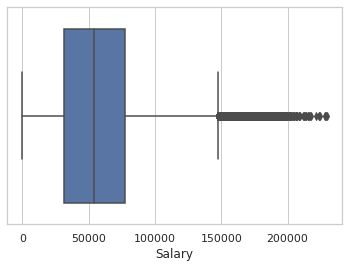

In [10]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["Salary"])

Text(0, 0.5, 'Density')

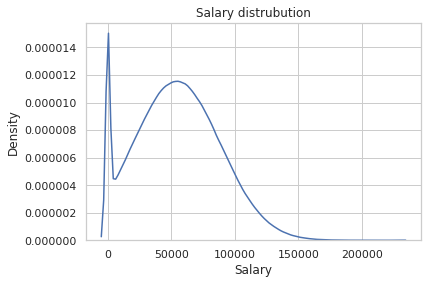

In [30]:
sns.distplot(df.Salary, hist=False) #this plot shows the distribution of the salary
plt.title('Salary distrubution')
plt.ylabel('Density')

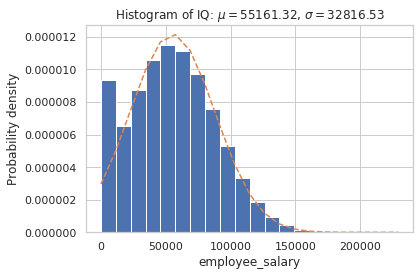

In [31]:
# In this plot, I fit the probability density function using the estimated parameters 
# mean and S.D from the data. Compare it to the histogram and we see that it is a descent match. 
mu = 5.516132e+04  # mean of distribution
sigma = 3.281653e+04  # standard deviation of distribution

num_bins = 20

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(employee['Salary'], num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('employee_salary')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=55161.32$, $\sigma=32816.53$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

In [13]:
stats.mode(df.Salary)

ModeResult(mode=array([0.]), count=array([231671]))

Firstly, we see that there's no missing data in the Salary column. Secondly, the boxplot revels that there's lots of outliers. About 232k employees with zero salary. Definitely need further inspection to make sure they are really outliers. The histogram also shows that an abundance of people gets paid  ~ 54k. The employee income varies from 0 to  230k.\


Let's now investigate why we have employees with zero salary, the age distribution of the employees and how long the employees have been working at the company. In order to do these, first I convert the types of ['Date of Birth', 'Employee start date'] columns to datetime.

In [14]:
df.dtypes

Employee Number                  object
SSN                              object
GIN                             float64
Employee Start Date              object
Work Phone Number                object
Work Phone Extension            float64
Company Email Address            object
Salary                          float64
First Name                       object
Last Name                        object
Middle Name                      object
Date of Birth                    object
Home Address: Street             object
Home Address: Suite             float64
Home Address: City               object
Home Address: State/Province     object
Home Address: Country            object
Home Address: ZIP/Postal          int64
ADDRESS_LINE_4                  float64
CELL/MOBILE_NO                   object
dtype: object

In [0]:
df['Employee Start Date'] = pd.to_datetime(df['Employee Start Date'])
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])

In [16]:
df.dtypes

Employee Number                         object
SSN                                     object
GIN                                    float64
Employee Start Date             datetime64[ns]
Work Phone Number                       object
Work Phone Extension                   float64
Company Email Address                   object
Salary                                 float64
First Name                              object
Last Name                               object
Middle Name                             object
Date of Birth                   datetime64[ns]
Home Address: Street                    object
Home Address: Suite                    float64
Home Address: City                      object
Home Address: State/Province            object
Home Address: Country                   object
Home Address: ZIP/Postal                 int64
ADDRESS_LINE_4                         float64
CELL/MOBILE_NO                          object
dtype: object

In [17]:
print(df[['Employee Start Date', 'Date of Birth']].min())
print('\n')
print(df[['Employee Start Date', 'Date of Birth']].max())


Employee Start Date   1967-08-12
Date of Birth         1954-07-11
dtype: datetime64[ns]


Employee Start Date   2019-10-22
Date of Birth         2005-04-23
dtype: datetime64[ns]


Here we see that we have employees who joined the company in 1960's and are still at the company as well as the employees who recently joined the company. We can also see that the most recent employees who joined the company will be starting work at the end of the year, so that explains why we have lots of employees with zero salaries. 

I will now add few new columns to the dataset, one will be the age of the employees column and the other will be years spent at the company.

In [0]:
import datetime
from datetime import date

def calculateAge(birthDate):
    today = date.today()
    age = today.year - birthDate.year - \
        ((today.month, today.day) < (birthDate.month, birthDate.day))
    return age

In [0]:
Age = []
for age in df['Date of Birth']:
    Age.append(calculateAge(age))
df['Employee Age'] = Age

In [0]:
Age = []
for age in df['Employee Start Date']:
    Age.append(calculateAge(age))
df['Years at Company'] = Age

In [21]:
df.head()

,Employee Number,SSN,GIN,Employee Start Date,Work Phone Number,Work Phone Extension,Company Email Address,Salary,First Name,Last Name,Middle Name,Date of Birth,Home Address: Street,Home Address: Suite,Home Address: City,Home Address: State/Province,Home Address: Country,Home Address: ZIP/Postal,ADDRESS_LINE_4,CELL/MOBILE_NO,Employee Age,Years at Company
0,MXESC71DBJAV217S,833-89-7281,nan,2018-01-19,(322)919-2663,4730.00,benjaminashley@hotmail.com,93969.33,James,Gibson,Anthony,1999-07-07,402 Kenneth Mission Apt. 182,2515.00,Lake Victoriabury,New Jersey,US,18410,nan,278-437-2933,20,1
1,N11KZNKWH6WBK0AS,279-44-2127,nan,1997-10-05,7363157315,nan,scott56@burns.org,122429.09,Michael,Newman,NaN,1962-10-22,80733 Martinez Dam,nan,Reyesshire,Vermont,US,2919,nan,001-143-707-8726,57,22
2,Y964R1P84V3ENOTH,125-14-2092,nan,2005-03-16,001-715-193-7453,nan,ccamacho@whitaker-alexander.net,73471.09,Amy,Davis,James,1979-02-03,5963 Danielle Manor Apt. 161,3533.00,Port Jamesport,Tennessee,US,98819,nan,226-702-7024,40,14
3,IHUAZU84U8R8HTJR,486-06-5545,nan,2018-09-21,494.136.5034,187.00,yroberts@stephens.com,27092.79,Stephen,Stevenson,NaN,1998-12-12,082 Snow Prairie,nan,Lake Kyle,Tennessee,US,38015,nan,+1-576-588-5354,20,1
4,KANWNQGQEHWK65YW,323-32-0438,nan,1989-03-11,545-168-1402,79483.00,ravenbailey@gmail.com,33744.05,Christopher,Hansen,Omar,1958-06-27,6135 Cynthia Via Apt. 964,nan,Port Jacob,Georgia,US,60676,nan,(394)208-1399,61,30


In [22]:
print('Average Number of Years at the company for currently active employees: {:.2f} years'.format(df['Years at Company'].mean()))

Average Number of Years at the company for currently active employees: 12.95 years


In [23]:
print("Number of Years at the company varies from {} to {} years.".format(df['Years at Company'].min(), df['Years at Company'].max()))

Number of Years at the company varies from 0 to 52 years.


We see that the average is definitely low given the number of years spent at the company varies from 0 to 52. This is because there's lot of employees who recently joined the company. We can also note this from the distribution below.

Text(0, 0.5, 'Density')

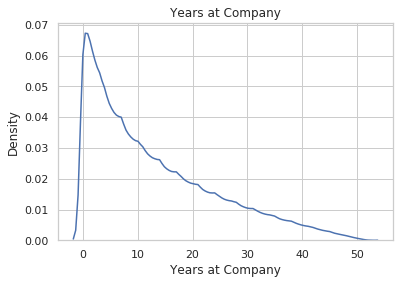

In [32]:
sns.distplot(df['Years at Company'],hist=False)
plt.title('Years at Company')
plt.ylabel('Density')

In [34]:
print('Current employees: average age = {:.1f} years old and standard deviation = {:.1f}'.format(
    df['Employee Age'].mean(), df['Employee Age'].std()))

Current employees: average age = 39.4 years old and standard deviation = 14.7


Text(0, 0.5, 'density')

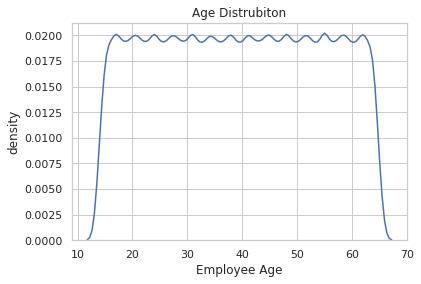

In [33]:
sns.distplot(df['Employee Age'],hist=False)
plt.title('Age Distrubiton')
plt.ylabel('density')

In [35]:
df['Employee Age'].describe()

count   4000000.00
mean         39.42
std          14.67
min          14.00
25%          27.00
50%          39.00
75%          52.00
max          65.00
Name: Employee Age, dtype: float64

Interestingly the company have employees as young as 14yrs old. Having done some exploration, I will answer the questions below.

# Who are the top ten people with the highest salary? 

We can use python's builtin function .nlargest to get the largest n elements. Here's I have limited the columns to just Full name, state and salary. 

In [27]:
df.nlargest(10,['Salary'])[['First Name', 'Last Name', 'Middle Name', 'Salary','Home Address: State/Province']]

,First Name,Last Name,Middle Name,Salary,Home Address: State/Province
3905190,Destiny,Lyons,Mark,229539.74,Utah
3177489,Alexander,Patterson,NaN,228738.80,Virginia
2315870,Daniel,Hamilton,NaN,228378.05,Mississippi
3655643,Derrick,Pennington,Benjamin,227878.70,South Carolina
2899707,Dana,Williams,Douglas,224542.28,Minnesota
1445827,Amy,Brown,NaN,223935.60,Wisconsin
216327,Victoria,Williams,Robert,223854.54,Idaho
3790066,Misty,Jones,Tanya,221394.59,New Mexico
1272014,James,Hunter,Kelly,217851.05,New York
1448538,Stacy,Chavez,NaN,216961.08,West Virginia


# Which state has the highest collective salary? 

In order to find the highest collective salary of any state, we can first group the data by state and then we can compute the total income per state. This can be easily done in 2 ways. \
Although we just want the highest collective salary of one state, I have shown the first 5 states for illustrative purpose. 

In [28]:
collective_state_salary= df.groupby('Home Address: State/Province').agg({'Salary':['sum']})[:5]
collective_state_salary.columns = ['Total Income per state']
collective_state_salary = collective_state_salary.reset_index()
collective_state_salary

,Home Address: State/Province,Total Income per state
0,Alabama,4388155148.80
1,Alaska,4428274609.39
2,Arizona,4454222888.07
3,Arkansas,4397547861.36
4,California,4411456767.44


# Which state has the most employees working at MegaCorp?

In [29]:
pd.DataFrame(df['Home Address: State/Province'].value_counts())[:5]

,Home Address: State/Province
Arizona,80726
Rhode Island,80711
Hawaii,80638
New Hampshire,80588
South Carolina,80514


So 'Arizona' has most employees working at MegaCorp. Again, for illustrative purpose I show the top 5. 

In [39]:
df.isna().sum()# just to make sure we don't have any missing info in other columns.

Employee Number                       0
SSN                                   0
GIN                             4000000
Employee Start Date                   0
Work Phone Number                     0
Work Phone Extension            1600427
Company Email Address                 0
Salary                                0
First Name                            0
Last Name                             0
Middle Name                     2398214
Date of Birth                         0
Home Address: Street                  0
Home Address: Suite             2398629
Home Address: City                    0
Home Address: State/Province          0
Home Address: Country                 0
Home Address: ZIP/Postal              0
ADDRESS_LINE_4                  4000000
CELL/MOBILE_NO                        0
Employee Age                          0
Years at Company                      0
dtype: int64